# Deep Learning мастерская

## Pytorch - НАЧАЛО!

Здесь мы изучим базовые понятия pytorch и фундаментальные кирпичики. http://pytorch.org/. Убедитесь что он у вас установлен. На сайте более чем понятно, как это сделать.
Также удостоверьтесь, что у вас стоит свежая версия **numpy**. 




Кого интересует разница между TensorFlow и Pytorch - вот [здесь](https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b) можно почитать подробнее.


## Импортирование

In [366]:
import torch
print(torch.__version__)

0.4.0


### Как numpy

Массивы в numpy 

In [367]:
from  __future__  import print_function
import numpy as np
x = np.arange(16).reshape(4,4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x,x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x,axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



### pytorch
Хорошо, давайте попробуем pytorch

In [368]:
x = torch.empty(5, 3) 
r = torch.rand(5, 3)
z = torch.zeros(5, 3, dtype=torch.long)
t = torch.tensor([5.5, 3]) # constract tensor from data directly
print('x:', x, '\n', 'r:', r, '\n', 'z:', z, '\n', 't:', t)

x: tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  5.3698e-42,  0.0000e+00],
        [ 0.0000e+00,  6.9768e+22,  0.0000e+00]]) 
 r: tensor([[ 0.3343,  0.7549,  0.5344],
        [ 0.4375,  0.0716,  0.8813],
        [ 0.7735,  0.9566,  0.7316],
        [ 0.5687,  0.8705,  0.9859],
        [ 0.1002,  0.5380,  0.0787]]) 
 z: tensor([[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]) 
 t: tensor([ 5.5000,  3.0000])


In [369]:
# addition tensors
result = torch.empty(5, 3)
torch.add(x, r, out=result)

print(x)
print(result)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  5.3698e-42,  0.0000e+00],
        [ 0.0000e+00,  6.9768e+22,  0.0000e+00]])
tensor([[ 3.3434e-01,  7.5491e-01,  5.3443e-01],
        [ 4.3751e-01,  7.1637e-02,  8.8134e-01],
        [ 7.7353e-01,  9.5663e-01,  7.3158e-01],
        [ 5.6871e-01,  8.7053e-01,  9.8593e-01],
        [ 1.0016e-01,  6.9768e+22,  7.8749e-02]])


Eсть методы с подчеркиванием на конце, а есть без, например, `add_` и `add`. _ это аналог атрибута `inplace=True`. Давайте посмотрим на примеры.

In [370]:
print('x:', x)
x.add(r)
print('again x, the same:', x)
x.add_(r)
print('x with add_', x)

x: tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  5.3698e-42,  0.0000e+00],
        [ 0.0000e+00,  6.9768e+22,  0.0000e+00]])
again x, the same: tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  5.3698e-42,  0.0000e+00],
        [ 0.0000e+00,  6.9768e+22,  0.0000e+00]])
x with add_ tensor([[ 3.3434e-01,  7.5491e-01,  5.3443e-01],
        [ 4.3751e-01,  7.1637e-02,  8.8134e-01],
        [ 7.7353e-01,  9.5663e-01,  7.3158e-01],
        [ 5.6871e-01,  8.7053e-01,  9.8593e-01],
        [ 1.0016e-01,  6.9768e+22,  7.8749e-02]])


In [371]:
print(x.size()) # get the size

torch.Size([5, 3])


Хорошо. Давайте пильнем тензоры из нумпаевских.

In [372]:
x = np.arange(16).reshape(4,4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print ("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print ("add 5 :\n%s" % (x+5))
print ("X*X^T  :\n%s" % torch.matmul(x,x.transpose(1,0)))
print ("mean over cols :\n%s" % torch.mean(x,dim=-1))
print ("cumsum of cols :\n%s" % torch.cumsum(x,dim=0))

X :
tensor([[  0.,   1.,   2.,   3.],
        [  4.,   5.,   6.,   7.],
        [  8.,   9.,  10.,  11.],
        [ 12.,  13.,  14.,  15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.],
        [ 13.,  14.,  15.,  16.],
        [ 17.,  18.,  19.,  20.]])
X*X^T  :
tensor([[  14.,   38.,   62.,   86.],
        [  38.,  126.,  214.,  302.],
        [  62.,  214.,  366.,  518.],
        [  86.,  302.,  518.,  734.]])
mean over cols :
tensor([  1.5000,   5.5000,   9.5000,  13.5000])
cumsum of cols :
tensor([[  0.,   1.,   2.,   3.],
        [  4.,   6.,   8.,  10.],
        [ 12.,  15.,  18.,  21.],
        [ 24.,  28.,  32.,  36.]])


Хорошо. Кто знаком с numpy, то может заметить, что некоторые похожие методы в numpy называются чуть иначе в pytorch. Например `numpy.rehsape()` в pytorch будет `torch.view()`. Полный список различий в методах можно глянуть вот [**тут**](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users).

## CUDA

Чтобы ваши вычисления были быстрее, pytorch из коробки поддерживает GPU без танцев с бубном и всеми остальными прелестями настройки юзания видеокарт. Делается элементарно. 

In [373]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[  1.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.],
        [ 13.,  14.,  15.,  16.]], device='cuda:0')
tensor([[  1.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.],
        [ 13.,  14.,  15.,  16.]], dtype=torch.float64)


Теперь, чтобы мутить обучение поглубже, нам нужно что то типа обратного распространения ошибки (backpropagation). Сама по себе тема сложная (на самом деле нет (привет, meduza)), но разберемся с этим чуть позже. 

## Autograd

В pytorch есть `autograd`, который позволяет дифференцировать автоматически для всех операций на тензорах. Это значит, что обратное распространение ошибки будет считаться автоматически по тому пути, как вы определили сеть, и может выполнить дифференцирование для каждой итерации. 

`torch.Tensor` центральный класс pytorch. Если указать атрибут `.require_grad`, то каждая операция будет отслеживаться и запоминаться, и когда вы закончите вычисления, мы можем вызвать метод `.backward()` и пайторч нам вычислит ошибку на каждой итерации автоматически. Градиенты будут хранится в атрибуте`.grad`. 

Можно и сказать пайторчу, чтобы он не трекал операции через `with torch.no_grad():`.

In [374]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [375]:
y = x + 2
print(y)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [376]:
print(y.grad_fn) # so we can compute grad easy

Хорошо. Давайте добавим вычислений.

In [377]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)


Давайте обратно продифференцируем нашу маленькую функцию, потому что она содержит просто один скаляр, `out.backward()` эквивалентно `out.backward(torch.tensor(1))`.

In [378]:
out.backward()
print(x.grad) # d(out)/dx

tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


Прикольнемся дальше.

In [379]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-306.2654,  730.2112,  919.5482])


In [380]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([  51.2000,  512.0000,    0.0512])


Теперь ближе к реальности.

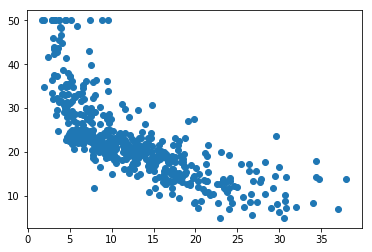

In [381]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

In [382]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(5.)
y = torch.tensor(10.)


y_pred = w * x + b
loss = torch.mean( (y_pred - y)**2 )

# propagete gradients
loss.backward()


$(\omega*x + b - y)^2$

In [383]:
w.grad

tensor([-100.])

In [384]:
from torch.autograd import Variable
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(torch.FloatTensor(boston.data[:,-1] / 10))
y = torch.tensor(torch.FloatTensor(boston.target))


y_pred = w * x + b
loss = torch.mean( (y_pred - y)**2 )

# propagete gradients
loss.backward()

In [385]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


Если считать градиенты для нескольких лоссов, градиет будет добавляться в переменные, тогда удобно занулять градиенты между итерациями.

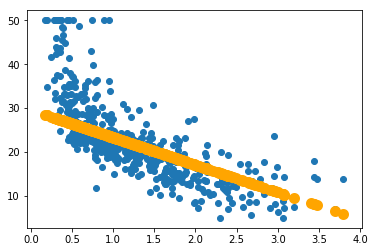

loss =  44.594173


In [386]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x  + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

# НЕЙРОСЕТКИ
Ладно давайте уже к мякотке!
Запилим базовую сверточную сетку.

In [387]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Функция `forward` обязательная и ее нужно определять, потому что она используются автоградом в `backward`.  В `forward` можно и нужно определять тензоры (и слои сетки)
Обучаемые параметры в сетке лежат в `net.paramentrs()`

In [388]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


Ну давайте прогоним какой нибудь невнятный шум через нашу сетку.

In [389]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out) 

tensor([[-0.1022, -0.0126, -0.1248,  0.0271, -0.0098,  0.0544,  0.0054,
          0.0324,  0.1035,  0.0132]])


**УРА**

**But!**


![](https://i.kym-cdn.com/photos/images/newsfeed/000/531/557/a88.jpg)

Итак мы немного изучили низкоуровневый пайторч и совсем чуть высокий уровень API. Теперь немного потренируемся ручками и головой. Придется написать [логрегрессию](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F) с помощью хайлевел апи. Будем различать два класса состоящих из двух букв **А** и **В**.

In [390]:
import os
import numpy as np
from scipy.misc import imread,imresize
from sklearn.model_selection import train_test_split
from glob import glob
# import urllib.request


def load_notmnist(path='./notMNIST_small',letters='ABCDEFGHIJ',
                  img_shape=(28,28),test_size=0.25,one_hot=False):
    
    # download data if it's missing. If you have any problems, go to the urls and load it manually.
    if not os.path.exists(path):
        print("Downloading data...")
        assert os.system('curl http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz > notMNIST_small.tar.gz') == 0
#         assert urllib.request.urlretrieve('http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz', 'notMNIST_small.tar.gz') == 0
        print("Extracting ...")
        assert os.system('tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log') == 0
    
    data,labels = [],[]
    print("Parsing...")
    for img_path in glob(os.path.join(path,'*/*')):
        class_i = img_path.split(os.sep)[-2]
        if class_i not in letters: continue
        try:
            data.append(imresize(imread(img_path), img_shape))
            labels.append(class_i,)
        except:
            print("found broken img: %s [it's ok if <10 images are broken]" % img_path)
        
    data = np.stack(data)[:,None].astype('float32')
    data = (data - np.mean(data)) / np.std(data)

    #convert classes to ints
    letter_to_i = {l:i for i,l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))
    
    if one_hot:
        labels = (np.arange(np.max(labels) + 1)[None,:] == labels[:, None]).astype('float32')
    
    #split into train/test
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, random_state=42)
    
    print("Done")
    return X_train, y_train, X_test, y_test

In [391]:
X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i"%(len(X_train),len(X_test)))

Parsing...


C:\Users\metya\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\metya\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done
Train size = 2808, test_size = 937


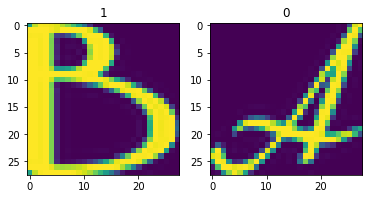

In [392]:
for i in [0,1]:
    plt.subplot(1,2,i+1)
    plt.imshow(X_train[i].reshape([28,28]))
    plt.title(str(y_train[i]))

In [393]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
               x = F.relu(self.conv1(x))
               return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call `.cuda()`, etc.
    


Формула логистической регрессии для бинарной классификации вот такая 

![](https://render.githubusercontent.com/render/math?math=P%28y_i%20%7C%20X_i%29%20%3D%20%5Csigma%28W%20%5Ccdot%20X_i%20%2B%20b%29%20%3D%7B%201%20%5Cover%20%7B1%2Be%5E%7B-%20%5BW%20%5Ccdot%20X_i%20%2B%20b%5D%7D%7D%20%7D&mode=display)

$\sigma$ - это функция называется сигмоида и раскрывается вот так $\frac{1}{1+e^{-x}}$

Определим модель:

In [394]:
# create a network that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit. 
model.add_module('l1', nn.Linear(784, 1))

# add softmax activation for probabilities. Normalize over axis 1
# note: layer names must be unique
model.add_module('l2', nn.Sigmoid())

print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [395]:
# create dummy data with 3 samples and 784 features
x = torch.FloatTensor(X_train[:3])
y = torch.FloatTensor(y_train[:3])

# compute outputs given inputs, both are variables
y_predicted = model(x)[:, 0]

y_predicted # display what we've got

tensor([ 0.4036,  0.4508,  0.3606])

Запишем функцию потерь (loss) для нашей задачи, минимум которой мы будем искать, чтобы научиться классифицировать. Для бинарной классификации чаще всего это функция кросс энтропии (или negative logloss).

![](https://render.githubusercontent.com/render/math?math=L%20%3D%20%7B1%20%5Cover%20N%7D%20%5Cunderset%7BX_i%2Cy_i%7D%20%5Csum%20-%20%5B%20%20y_i%20%5Ccdot%20log%20P%28y_i%20%7C%20X_i%29%20%2B%20%281-y_i%29%20%5Ccdot%20log%20%281-P%28y_i%20%7C%20X_i%29%29%20%5D&mode=display)

In [396]:

# crossentropy = 

BCE = torch.nn.modules.loss.BCELoss()
loss = BCE(y_predicted, y)

# assert tuple(crossentropy.size()) == (3,), "Crossentropy must be a vector with element per sample"
assert tuple(loss.size()) == (), "Loss must be scalar. Did you forget the mean/sum?"
assert loss.data.numpy() > 0, "Crossentropy must non-negative, zero only for perfect prediction"
assert loss.data.numpy() <= np.log(3), "Loss is too large even for untrained model. Please double-check it."

На каждой итерации надо будет занулять градиенты для наших параметров.
Для удобства в пайторче есть уже имплементированные методы оптимизации`torch.optim`. Заюзаем стохастический градиентный спуск.

In [397]:
loss

tensor(0.6513)

In [398]:
opt = torch.optim.SGD(model.parameters(), lr=0.001)

# here's how it's used:
loss.backward()      # add new gradients
opt.step()           # change weights
# opt.zero_grad()      # clear gradients


In [399]:
[p.grad for p in model.parameters()]

[tensor([[-0.3111, -0.4614, -0.4990, -0.4973, -0.4922, -0.4826, -0.4529,
          -0.4170, -0.2290, -0.0914,  0.0185,  0.1265,  0.1911,  0.1938,
           0.1869,  0.1590,  0.0482, -0.0686, -0.0686, -0.0686, -0.0686,
          -0.0686, -0.0686, -0.0647, -0.0686,  0.0063,  0.2388,  0.2607,
          -0.5041, -0.5041, -0.5041, -0.5041, -0.4973, -0.4839, -0.5041,
          -0.3709, -0.2407, -0.2428, -0.2407, -0.2202, -0.1041,  0.0633,
           0.1948,  0.1938,  0.1948,  0.0327, -0.0686, -0.0655, -0.0686,
          -0.0686, -0.0686, -0.0647, -0.0686,  0.1794,  0.2607,  0.1729,
          -0.5007, -0.5024, -0.5007, -0.5041, -0.4235, -0.1522, -0.0973,
           0.0686,  0.0018, -0.1430, -0.2339, -0.2407, -0.2418, -0.2407,
          -0.0938,  0.1712,  0.1948,  0.1597, -0.0448, -0.0686, -0.0665,
          -0.0686, -0.0647, -0.0686,  0.0283,  0.2607,  0.2555,  0.0141,
          -0.5041, -0.5041, -0.4990, -0.5041, -0.4149, -0.1061, -0.0086,
           0.1263,  0.1711,  0.1948, -0.0436, -0.23

In [400]:
# y.requires_grad = False

# dispose of o`a`ld variables to avoid bugs later
# del x, y, y_predicted, loss


### Для наглядности повторим в одном месте и собираем в цельное

In [401]:
# create network again just in case
model = nn.Sequential()
model.add_module('first', nn.Linear(784, 1))
model.add_module('second', nn.Sigmoid())

opt = torch.optim.SGD(model.parameters(), lr=1e-3)

history = []

for i in range(100):
    
    # sample 256 random images
    ix = np.random.randint(0, len(X_train), 256)
    x_batch = torch.FloatTensor(X_train[ix])
    y_batch = torch.FloatTensor(y_train[ix])
    
    # predict probabilities
    y_predicted = ### YOUR CODE
    
    # compute loss, just like before
    loss = ### YOUR CODE
    
    # compute gradients
    <YOUR CODE>
    
    # optimizer step
    <YOUR CODE>
    
    # clear gradients
    <YOUR CODE>
    
    history.append(loss.data.numpy()[0])
    
    if i % 10 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

SyntaxError: invalid syntax (<ipython-input-401-08377896440f>, line 18)

### Выполняем
Посмотрим что там у нас вышло.

In [ ]:
# use your model to predict classes (0 or 1) for all test samples
predicted_y_test = ### YOUR CODE
         
assert isinstance(predicted_y_test, np.ndarray), "please return np array, not %s" % type(predicted_y_test)
assert predicted_y_test.shape == y_test.shape, "please predict one class for each test sample"
assert np.in1d(predicted_y_test, y_test).all(), "please predict class indexes"

accuracy = np.mean(predicted_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.95, "try training longer"

### Сохранение и загрузка моделек
Для последующих целей в будущем, нашу модель можно сохранить и потом загрузить.

In [ ]:
torch.save(torch.state_dict(), 'modelka')


model.load_dict(torch.load('modelka')

model.eval()

In [402]:
Огромны

NameError: name 'Огромны' is not defined

NameError: name 'animation' is not defined

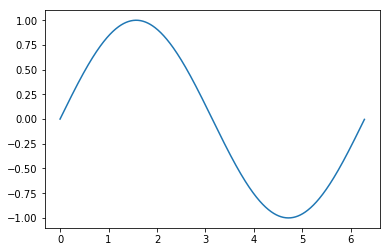

In [403]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,

# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init, interval=25, blit=True)

In [ ]:
torch.normal